In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import copy
import glob
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.onnx
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from tqdm.auto import tqdm
from torch.optim import Adam
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from torch.optim import adam
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet18, resnet34
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
train_non_scratch = glob.glob("/content/drive/MyDrive/scratch_project/train/images/non_scratch/*")
train_scratch = glob.glob("/content/drive/MyDrive/scratch_project/train/images/scratch/*")

test_non_scratch = glob.glob("/content/drive/MyDrive/scratch_project/test/images/non_scratch/*")
test_scratch = glob.glob("/content/drive/MyDrive/scratch_project/test/images/scratch/*")

In [ ]:
print(len(train_non_scratch), len(train_scratch))
print(len(test_non_scratch), len(test_scratch))

832 815
65 51


In [ ]:
train_paths = train_non_scratch + train_scratch
test_paths = test_non_scratch + test_scratch

In [ ]:
train_labels_non_scratch = []
train_labels_non_scratch_dir = '/content/drive/MyDrive/scratch_project/train/labels/non_scratch'

for file in os.listdir(train_labels_non_scratch_dir):
    with open(os.path.join(train_labels_non_scratch_dir, file)) as f:
        label = int(f.readline().split()[0])
        train_labels_non_scratch.append(label)

train_labels_scratch = []
train_labels_scratch_dir = '/content/drive/MyDrive/scratch_project/train/labels/scratch'

for file in os.listdir(train_labels_scratch_dir):
    with open(os.path.join(train_labels_scratch_dir, file)) as f:
        label = int(f.readline().split()[0])
        train_labels_scratch.append(label)

test_labels_non_scratch = []
test_labels_non_scratch_dir = '/content/drive/MyDrive/scratch_project/test/labels/non_scratch'

for file in os.listdir(test_labels_non_scratch_dir):
    with open(os.path.join(test_labels_non_scratch_dir, file)) as f:
        label = int(f.readline().split()[0])
        test_labels_non_scratch.append(label)


test_labels_scratch = []
test_labels_scratch_dir = '/content/drive/MyDrive/scratch_project/test/labels/scratch'

for file in os.listdir(test_labels_scratch_dir):
    with open(os.path.join(test_labels_scratch_dir, file)) as f:
        label = int(f.readline().split()[0])
        test_labels_scratch.append(label)

In [ ]:
print(train_labels_non_scratch)
print(train_labels_scratch)
print(test_labels_non_scratch)
print(test_labels_scratch)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(len(train_labels_non_scratch), len(train_labels_scratch))
print(len(test_labels_non_scratch), len(test_labels_scratch))

831 816
66 50


In [ ]:
train_labels = train_labels_non_scratch + train_labels_scratch
test_labels = test_labels_non_scratch + test_labels_scratch

In [ ]:
print(len(train_paths), len(train_labels))
print(len(test_paths), len(test_labels))

1647 1647
116 116


In [ ]:
train_paths, valid_paths, train_labels, valid_labels = train_test_split(train_paths, train_labels, stratify=train_labels)

In [ ]:
def show_random_images():
    path_random_non_scratch = random.choice(train_non_scratch)
    path_random_scratch = random.choice(train_scratch)


    fig = plt.figure(figsize=(10, 5))

    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(Image.open(path_random_non_scratch).convert("LA"))
    ax1.set_title("Non Scratch")

    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(Image.open(path_random_scratch).convert("LA"))
    ax2.set_title("Scratch")

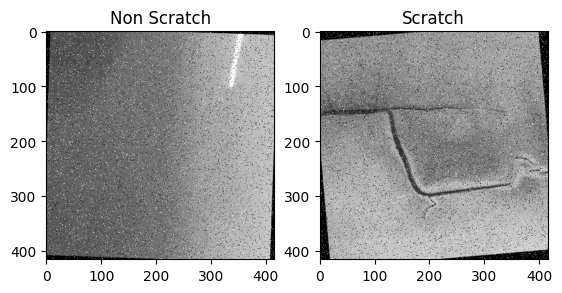

In [ ]:
show_random_images()

In [ ]:
class ScratchDataset(Dataset):
  def __init__(self, paths, labels, transform=None):
    self.paths = paths
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
    path = self.paths[index]
    image = Image.open(path).convert("RGB")

    if self.transform:
      image = self.transform(image)

    label = self.labels[index]
    label = torch.tensor([label])

    return image, label

In [ ]:
train_dataset = ScratchDataset(train_paths, train_labels)

In [ ]:
len(train_dataset)

1235

In [ ]:
next(iter(train_dataset))

(<PIL.Image.Image image mode=RGB size=416x416>, tensor([0]))

In [ ]:
class ScratchNet(nn.Module):
    def __init__(self):
        super(ScratchNet, self).__init__()
        self.backbone = resnet18(pretrained=True)
        self.fc1 = nn.Linear(in_features=512, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.backbone.conv1(x)
        x = self.backbone.bn1(x)
        x = self.backbone.relu(x)
        x = self.backbone.maxpool(x)

        x = self.backbone.layer1(x)
        x = self.backbone.layer2(x)
        x = self.backbone.layer3(x)
        x = self.backbone.layer4(x)

        x = self.backbone.avgpool(x)

        x = x.view(x.size(0), 512)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [ ]:
image_size = (500, 500)

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=15),
    transforms.Resize(size=image_size),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=image_size),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = ScratchDataset(train_paths, train_labels, train_transform)
valid_dataset = ScratchDataset(valid_paths, valid_labels, test_transform)

In [ ]:
model = ScratchNet()

lr = 3e-3

num_epochs = 50
train_batch_size = 16
valid_batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, num_workers=5, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=valid_batch_size, num_workers=5, shuffle=False)

dataloaders = {
    "train": train_dataloader,
    "val": valid_dataloader
}

logging_steps = {
    "train": len(dataloaders["train"]) // 10,
    "val": len(dataloaders["val"]) // 10
}

dataset_size = {
    "train": len(train_dataset),
    "val": len(valid_dataset)
}

batch_sizes = {
  "train": train_batch_size,
  "val": valid_batch_size
}

criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 72.5MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current

In [ ]:
def train_model(model, criterion, optimizer, num_epochs, device="cuda"):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0

    for epoch in tqdm(range(num_epochs), leave=False):
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for i, (inputs, labels) in tqdm(enumerate(dataloaders[phase]), leave=False, total=len(dataloaders[phase])):
                device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                model.to(device)
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    preds = outputs.sigmoid() > 0.5
                    loss = criterion(outputs, labels.float())

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if i % logging_steps[phase] == 0 and i > 0:
                    avg_loss = running_loss / ((i+1) * batch_sizes[phase])
                    avg_acc = running_corrects.double() / ((i+1) * batch_sizes[phase])

                    print(f"phase: {epoch+1} / {num_epochs} loss : {avg_loss} acc: {avg_acc}")

            epoch_loss = running_loss / dataset_size[phase]
            epoch_acc = running_corrects.double() / dataset_size[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since

    print(f"training took {time_elapsed} seconds")

    model.load_state_dict(best_model_wts)

    return model

In [ ]:
model = train_model(model, criterion, optimizer, num_epochs)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

phase: 1 / 50 loss : 1.3228006139397621 acc: 0.484375
phase: 1 / 50 loss : 1.1116241017977397 acc: 0.4875
phase: 1 / 50 loss : 1.0115020654418252 acc: 0.48295454545454547
phase: 1 / 50 loss : 0.9358186166861961 acc: 0.4870689655172414
phase: 1 / 50 loss : 0.892106231715944 acc: 0.4739583333333333
phase: 1 / 50 loss : 0.860814492369807 acc: 0.4956395348837209
phase: 1 / 50 loss : 0.834895144701004 acc: 0.515
phase: 1 / 50 loss : 0.8133149147033691 acc: 0.5350877192982456
phase: 1 / 50 loss : 0.7940916335210204 acc: 0.5478515625
phase: 1 / 50 loss : 0.7774651990809911 acc: 0.5625
phase: 1 / 50 loss : 0.7603304502673638 acc: 0.5576923076923077
train Loss: 0.7683 Acc: 0.5636


  0%|          | 0/26 [00:00<?, ?it/s]

phase: 1 / 50 loss : 1.0810712178548176 acc: 0.4583333333333333
phase: 1 / 50 loss : 1.0256263136863708 acc: 0.5
phase: 1 / 50 loss : 1.016718523842948 acc: 0.49107142857142855
phase: 1 / 50 loss : 1.1101828548643324 acc: 0.4444444444444444
phase: 1 / 50 loss : 1.1455358158458362 acc: 0.42613636363636365
phase: 1 / 50 loss : 1.1082289173052862 acc: 0.4519230769230769
phase: 1 / 50 loss : 1.078995128472646 acc: 0.4791666666666667
phase: 1 / 50 loss : 1.0431575354407816 acc: 0.5
phase: 1 / 50 loss : 1.0170907629163641 acc: 0.5131578947368421
phase: 1 / 50 loss : 1.0212540200778417 acc: 0.5089285714285714
phase: 1 / 50 loss : 1.0088251155355703 acc: 0.5135869565217391
phase: 1 / 50 loss : 1.006577000617981 acc: 0.51
val Loss: 1.0034 Acc: 0.5121



  0%|          | 0/78 [00:00<?, ?it/s]

phase: 2 / 50 loss : 0.6793042495846748 acc: 0.59375
phase: 2 / 50 loss : 0.6715942184130351 acc: 0.5875
phase: 2 / 50 loss : 0.6494759158654646 acc: 0.6278409090909091
phase: 2 / 50 loss : 0.6309762072974238 acc: 0.6379310344827587
phase: 2 / 50 loss : 0.6044113255209393 acc: 0.6614583333333334
phase: 2 / 50 loss : 0.5914449733357097 acc: 0.6729651162790697
phase: 2 / 50 loss : 0.5945894104242325 acc: 0.675
phase: 2 / 50 loss : 0.5952601202747279 acc: 0.6754385964912281
phase: 2 / 50 loss : 0.5817060838453472 acc: 0.6904296875
phase: 2 / 50 loss : 0.5803288422839742 acc: 0.6927816901408451
phase: 2 / 50 loss : 0.5710624437301587 acc: 0.6907051282051282
train Loss: 0.5771 Acc: 0.6980


  0%|          | 0/26 [00:00<?, ?it/s]

phase: 2 / 50 loss : 0.5650409956773123 acc: 0.75
phase: 2 / 50 loss : 0.5657239437103272 acc: 0.7375
phase: 2 / 50 loss : 0.5707545535905021 acc: 0.7232142857142857
phase: 2 / 50 loss : 0.5465693705611758 acc: 0.7361111111111112
phase: 2 / 50 loss : 0.5357681824402376 acc: 0.7556818181818182
phase: 2 / 50 loss : 0.5469787155206387 acc: 0.7548076923076923
phase: 2 / 50 loss : 0.5248684495687485 acc: 0.7583333333333333
phase: 2 / 50 loss : 0.5137246663079542 acc: 0.7647058823529411
phase: 2 / 50 loss : 0.5098617288627123 acc: 0.7664473684210527
phase: 2 / 50 loss : 0.49577447133404867 acc: 0.7738095238095238
phase: 2 / 50 loss : 0.5039869760689528 acc: 0.7717391304347826
phase: 2 / 50 loss : 0.5112574583292008 acc: 0.7675
val Loss: 0.5035 Acc: 0.7718



  0%|          | 0/78 [00:00<?, ?it/s]

phase: 3 / 50 loss : 0.539170365780592 acc: 0.671875
phase: 3 / 50 loss : 0.47573680281639097 acc: 0.7333333333333333
phase: 3 / 50 loss : 0.4662539701570164 acc: 0.7556818181818182
phase: 3 / 50 loss : 0.5164380268803959 acc: 0.7133620689655172
phase: 3 / 50 loss : 0.5095913774437375 acc: 0.7274305555555556
phase: 3 / 50 loss : 0.5167667747930039 acc: 0.7340116279069767
phase: 3 / 50 loss : 0.5258956581354142 acc: 0.72875
phase: 3 / 50 loss : 0.517496827401613 acc: 0.743421052631579
phase: 3 / 50 loss : 0.5115708690136671 acc: 0.75
phase: 3 / 50 loss : 0.5150127091877897 acc: 0.7491197183098591
phase: 3 / 50 loss : 0.5141465961455535 acc: 0.7355769230769231
train Loss: 0.5196 Acc: 0.7433


  0%|          | 0/26 [00:00<?, ?it/s]

phase: 3 / 50 loss : 0.5417834917704264 acc: 0.7708333333333334
phase: 3 / 50 loss : 0.5606767952442169 acc: 0.75
phase: 3 / 50 loss : 0.5673239699431828 acc: 0.7410714285714286
phase: 3 / 50 loss : 0.5850778652562035 acc: 0.7291666666666666
phase: 3 / 50 loss : 0.5998273139650171 acc: 0.7329545454545454
phase: 3 / 50 loss : 0.5976257759791154 acc: 0.7307692307692307
phase: 3 / 50 loss : 0.5484371244907379 acc: 0.7583333333333333
phase: 3 / 50 loss : 0.575478162835626 acc: 0.7463235294117647
phase: 3 / 50 loss : 0.5706653610656136 acc: 0.7532894736842105
phase: 3 / 50 loss : 0.5532857931795574 acc: 0.7619047619047619
phase: 3 / 50 loss : 0.5675813205864119 acc: 0.7527173913043478
phase: 3 / 50 loss : 0.5694807708263397 acc: 0.7525
val Loss: 0.5609 Acc: 0.7597



  0%|          | 0/78 [00:00<?, ?it/s]

phase: 4 / 50 loss : 0.4456213675439358 acc: 0.84375
phase: 4 / 50 loss : 0.4244613617658615 acc: 0.8291666666666667
phase: 4 / 50 loss : 0.4417654519731348 acc: 0.8181818181818182
phase: 4 / 50 loss : 0.4569835179838641 acc: 0.8060344827586207
phase: 4 / 50 loss : 0.46460671308967805 acc: 0.8020833333333334
phase: 4 / 50 loss : 0.4650023059789525 acc: 0.7965116279069767
phase: 4 / 50 loss : 0.45818260610103606 acc: 0.795
phase: 4 / 50 loss : 0.4786324914087329 acc: 0.7796052631578947
phase: 4 / 50 loss : 0.47649878077208996 acc: 0.783203125
phase: 4 / 50 loss : 0.47349035110272153 acc: 0.7887323943661971
phase: 4 / 50 loss : 0.4722996481980842 acc: 0.7788461538461539
train Loss: 0.4773 Acc: 0.7870


  0%|          | 0/26 [00:00<?, ?it/s]

phase: 4 / 50 loss : 0.962197333574295 acc: 0.5625
phase: 4 / 50 loss : 0.9335270583629608 acc: 0.525
phase: 4 / 50 loss : 0.993919095822743 acc: 0.5267857142857143
phase: 4 / 50 loss : 0.9330790208445655 acc: 0.5555555555555556
phase: 4 / 50 loss : 0.8645198534835469 acc: 0.5852272727272727
phase: 4 / 50 loss : 0.8615531898461856 acc: 0.5817307692307693
phase: 4 / 50 loss : 0.9138451794783274 acc: 0.5541666666666667
phase: 4 / 50 loss : 0.9175926569630118 acc: 0.5404411764705882
phase: 4 / 50 loss : 0.9450088660967978 acc: 0.5328947368421053
phase: 4 / 50 loss : 0.9287182532605671 acc: 0.5357142857142857
phase: 4 / 50 loss : 0.9442395114380381 acc: 0.532608695652174
phase: 4 / 50 loss : 0.9493519580364227 acc: 0.53
val Loss: 0.9383 Acc: 0.5364



  0%|          | 0/78 [00:00<?, ?it/s]

phase: 5 / 50 loss : 0.44451894983649254 acc: 0.796875
phase: 5 / 50 loss : 0.4642228742440542 acc: 0.8083333333333333
phase: 5 / 50 loss : 0.5014622848142277 acc: 0.7698863636363636
phase: 5 / 50 loss : 0.5101342427319494 acc: 0.7693965517241379
phase: 5 / 50 loss : 0.4914448567562633 acc: 0.7847222222222222
phase: 5 / 50 loss : 0.47192003352697504 acc: 0.7936046511627907


KeyboardInterrupt: 

In [ ]:
model_path = "scratch_net_deep.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved at: {model_path}")

In [ ]:
loaded_model = ScratchNet()
loaded_model.load_state_dict(torch.load("scratch_net_deep.pth"))
loaded_model.eval()

In [ ]:
def test_model(model, criterion, device="cuda"):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    model = model.to(device)

    for inputs, labels in tqdm(dataloaders["val"], desc="Testing"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            preds = outputs.sigmoid() > 0.5
            loss = criterion(outputs, labels.float())

            test_loss += loss.item() * inputs.size(0)
            test_corrects += torch.sum(preds == labels.data)

    test_loss = test_loss / len(valid_dataset)
    test_acc = test_corrects.double() / len(valid_dataset)

    print("Test Loss: {:.4f} Test Accuracy: {:.4f}".format(test_loss, test_acc))

test_model(loaded_model, criterion)

In [ ]:
def evaluate_model(model, criterion, device="cuda"):
    model.eval()
    y_true = []
    y_pred = []

    for inputs, labels in tqdm(dataloaders["val"], desc="Evaluating"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            preds = outputs.sigmoid() > 0.5

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))


evaluate_model(loaded_model, criterion)

In [ ]:
# def plot_confusion_matrix(cm):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.title('Confusion Matrix')
#     plt.show()

# # Call the function to plot the confusion matrix
# plot_confusion_matrix(cm)

In [ ]:
import time

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dummy_input = torch.randn(1, 3, 224, 224).to(device)

model.to(device)

model(dummy_input)

num_iterations = 100
total_time = 0

for _ in range(num_iterations):
    start_time = time.time()
    with torch.no_grad():
        model(dummy_input)
    end_time = time.time()
    total_time += (end_time - start_time)

average_inference_time = total_time / num_iterations

print(f"Average Inference Time per Iteration: {average_inference_time:.4f} seconds")

In [ ]:
!nvidia-smi

In [ ]:
model = torch.load("scratch_net.pth")
model.eval()

dummy_input = torch.randn(1, 3, 224, 224)

torch.onnx.export(model, dummy_input, "scratch_net.onnx")